<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2023/24 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G1
#### Team: Group 1
#### Members:
1. CHONG SHIH RUI ZACHARY
2. YANG ZHONG HNG REUBEN
3. KEAGAN PAUL POULOSE
4. LUCAS SONG KANGZHENG
5. 

#### Dataset: Wine dataset

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('wine.csv')

In [5]:
df.head()

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,Sulphates,Alcohol,Quality
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,0.45,8%,6
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,0.49,9%,6
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,0.44,10%,6
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,0.40,9%,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4898 non-null   int64  
 1   Fixed_Acidity     4680 non-null   float64
 2   Volatile_Acidity  4848 non-null   float64
 3   Citric_Acid       4898 non-null   float64
 4   Residual_Sugar    4898 non-null   object 
 5   Chlorides         4898 non-null   float64
 6   Free_SO2          4898 non-null   float64
 7   Total_SO2         4898 non-null   float64
 8   Density           4674 non-null   object 
 9   pH                4898 non-null   object 
 10  Sulphates         4898 non-null   float64
 11  Alcohol           4898 non-null   object 
 12  Quality           4898 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 497.6+ KB


In [7]:
df["Residual_Sugar"].unique()

array(['High', 'Low', 'Moderate'], dtype=object)

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**This dataset gives the quality of wine.
Each row is an observation and represents a type of wine, and along each row, you find values that describe certain attributes about the wine. The Quality variable serves as our target variable that we will be predicting.**

**b.** State the size of the dataset

In [8]:
df.size #Size of dataset

63674

**As shown above, the size of the Wine dataset is 63674** 

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

|Column name|Description|Data type|
|---|---|---|
|ID| Unique Id of a wine | Categorical |
|Fixed_Acidity| Amount of Tartaric acid, measured in g/dm3 | Numerical |
|Volatile_Acidity| Amount of Acetic acid, measured in g/dm3  | Numerical |
|Citric_Acid| Amount measured in g/dm3 | Numerical |
|Residual_Sugar| Level of residual sugar content | Categorical (“High”, “Moderate”, “Low”) |
|Chlorides| Amount of Sodium chloride, measured in g/dm3 | Numerical |
|Free_SO2| Amount measured in mg/dm3 | Numerical |
|Total_SO2| Amount measured in mg/dm3  | Numerical |
|Density| Amount measured in g/dm3 | Categorical (“<0.99”, “0.99-1.00”, “>1.00”) |
|pH| The measure of acidity of the wine | Categorical (“Neutral”, “Acidic”, “Highly Acidic”)| 
|Sulphates|Potassium sulphate, measured in g/dm3 | Numerical |
|Alcohol| Level of alcohol content | Categorical (8% through 14% in discrete levels)|
|Quality| Score based on sensory data | Categorical (0 through 10 (0 is bad, 10 is good))|

In particular, we take note that the Quality variable, our target, is a categorical variable. This means it cannot be graded on a scale of 1-10 with a float variable type. Each prediction can thus only take fixed values from 0 - 10.

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [9]:
n_rows, n_cols = df.shape #Number of rows and columns in wine dataset
(1 - df.count() / n_rows)*100 #Percentage of missing data

ID                  0.000000
Fixed_Acidity       4.450796
Volatile_Acidity    1.020825
Citric_Acid         0.000000
Residual_Sugar      0.000000
Chlorides           0.000000
Free_SO2            0.000000
Total_SO2           0.000000
Density             4.573295
pH                  0.000000
Sulphates           0.000000
Alcohol             0.000000
Quality             0.000000
dtype: float64

|Column name|Percentage of missing data|How to resolve|
|---|---|---|
|ID| 0% | NA |
|Fixed_Acidity| 4.450796% | Less than 5%, so we should impute |
|Volatile_Acidity| 1.020825%  | Less than 5%, so we should impute |
|Citric_Acid| 0% | NA |
|Residual_Sugar| 0% | NA |
|Chlorides| 0% | NA |
|Free_SO2| 0% | NA |
|Total_SO2| 0%  | NA |
|Density| 4.573295% | Less than 5%, so we should impute |
|pH| 0% | NA | 
|Sulphates|0%| NA |
|Alcohol| 0% | NA |
|Quality| 0% | NA |

**Whether we use mean/mode for imputation, probably should explain why**

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

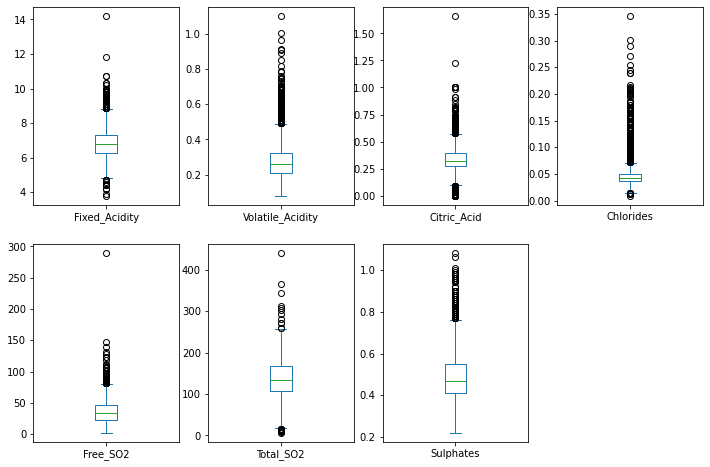

In [10]:
#Display boxplot across all numerical variables to help identify outliers
df_numerics = df[["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(12, 8))
plt.show()

Our group defines outliers as anything above or below 3sd from the mean value. We only consider outliers for numerical variables, as we find that all information stored in the categorical variables will be useful for us. We first examine how many outliers there are for each variable.

In [81]:
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

categories = ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates"]
total = 0
for category in categories:
    
    lower, upper = three_sd_range(df[category])
    outliers = df[(df[category] >= upper) | (df[category] <= lower)]
    total += len(outliers)
    print('No. of outliers in ' + category + ': ' + str(len(outliers)) + '(' + str(round(len(outliers)/len(df),3)*100) + '%)')

print('Total possible number of rows with outliers in any category: ' + str(total) + '(' + str(round(total/len(df),3)*100) + '%)')

No. of outliers in Fixed_Acidity: 44(0.8999999999999999%)
No. of outliers in Volatile_Acidity: 78(1.6%)
No. of outliers in Citric_Acid: 85(1.7000000000000002%)
No. of outliers in Chlorides: 102(2.1%)
No. of outliers in Free_SO2: 32(0.7000000000000001%)
No. of outliers in Total_SO2: 11(0.2%)
No. of outliers in Sulphates: 47(1.0%)
Total possible number of rows with outliers in any category: 399(8.1%)


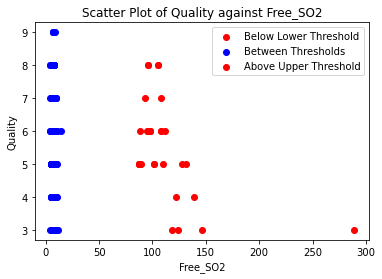

In [68]:
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

lower, upper = three_sd_range(df['Free_SO2'])

# Plot points below the lower threshold in red
plt.scatter(df[df['Free_SO2'] < lower]['Free_SO2'], df[df['Free_SO2'] < lower]['Quality'], color='red', label='Below Lower Threshold')

# Plot points between the lower and upper thresholds in blue
plt.scatter(df[(df['Free_SO2'] >= lower) & (df['Free_SO2'] <= upper)]['Fixed_Acidity'], df[(df['Free_SO2'] >= lower) & (df['Free_SO2'] <= upper)]['Quality'], color='blue', label='Between Thresholds')

# Plot points above the upper threshold in red
plt.scatter(df[df['Free_SO2'] > upper]['Free_SO2'], df[df['Free_SO2'] > upper]['Quality'], color='red', label='Above Upper Threshold')

plt.title('Scatter Plot of Quality against Free_SO2')
plt.xlabel('Free_SO2')
plt.ylabel('Quality')

plt.legend()
plt.show()



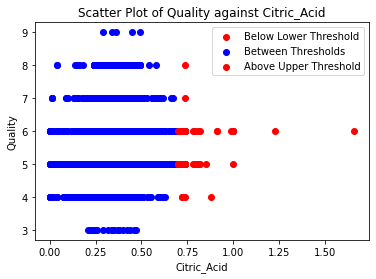

In [69]:
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

lower, upper = three_sd_range(df['Citric_Acid'])

# Plot points below the lower threshold in red
plt.scatter(df[df['Citric_Acid'] < lower]['Citric_Acid'], df[df['Citric_Acid'] < lower]['Quality'], color='red', label='Below Lower Threshold')

# Plot points between the lower and upper thresholds in blue
plt.scatter(df[(df['Citric_Acid'] >= lower) & (df['Citric_Acid'] <= upper)]['Citric_Acid'], df[(df['Citric_Acid'] >= lower) & (df['Citric_Acid'] <= upper)]['Quality'], color='blue', label='Between Thresholds')

# Plot points above the upper threshold in red
plt.scatter(df[df['Citric_Acid'] > upper]['Citric_Acid'], df[df['Citric_Acid'] > upper]['Quality'], color='red', label='Above Upper Threshold')

plt.title('Scatter Plot of Quality against Citric_Acid')
plt.xlabel('Citric_Acid')
plt.ylabel('Quality')

plt.legend()
plt.show()

Seeing that the dataset contains close to 5000 entries, for all the features containing outliers, the outliers account for less than 10% of values. Upon also inspecting a few variables to see how outliers affect the quality score, it does not seem that outliers in the variables significantly show any change to the quality of the wine. 

However, seeing that our data set is small, and that we are also unsure how the outliers in the data even come about (whether by erroneous data collection, or naturally occurring outlier data), we have made the decision to retain all outlier data, so that our model will be able to fit the 

**Response.** 

**c.** For categorical variables, perform the necessary encoding.

In [11]:
#Unique values of Residual_Sugar
df["Residual_Sugar"].unique() 

array(['High', 'Low', 'Moderate'], dtype=object)

In [12]:
#Unique values of Density
df["Density"].unique()

array(['>1.00', '0.99-1.00', nan, '<0.99'], dtype=object)

In [13]:
#Unique values of pH
df["pH"].unique()

array(['Acidic', 'Highly Acidic', 'Neutral'], dtype=object)

In [14]:
df = pd.read_csv('wine.csv')

In [15]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

#Encoding Residual_Sugar
dummy1 = pd.get_dummies(df["Residual_Sugar"])
dummy2 = pd.get_dummies(df["Density"])
dummy3 = pd.get_dummies(df["pH"])
df = pd.concat([df,dummy1,dummy2,dummy3], axis=1)

In [16]:
df

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,...,Quality,High,Low,Moderate,0.99-1.00,<0.99,>1.00,Acidic,Highly Acidic,Neutral
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,...,6,1,0,0,0,0,1,1,0,0
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,...,6,0,1,0,1,0,0,1,0,0
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,...,6,0,1,0,1,0,0,1,0,0
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,...,6,0,0,1,1,0,0,1,0,0
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,...,6,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,4894,6.2,0.21,0.29,Low,0.039,24.0,92.0,0.99-1.00,Acidic,...,6,0,1,0,1,0,0,1,0,0
4894,4895,6.6,0.32,0.36,Moderate,0.047,57.0,168.0,0.99-1.00,Acidic,...,5,0,0,1,1,0,0,1,0,0
4895,4896,6.5,0.24,0.19,Low,0.041,30.0,111.0,0.99-1.00,Highly Acidic,...,6,0,1,0,1,0,0,0,1,0
4896,4897,5.5,0.29,0.30,Low,0.022,20.0,110.0,<0.99,Acidic,...,7,0,1,0,0,1,0,1,0,0


### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

In [17]:
#Five-number summary of numerical measures
df[ ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates","Quality"] ].describe()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Chlorides,Free_SO2,Total_SO2,Sulphates,Quality
count,4680.000000,4848.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.851143,0.277986,0.334136,0.045772,35.308085,137.346264,0.489822,5.877909
std,0.841314,0.100726,0.120969,0.021848,17.007137,43.564766,0.114144,0.885639
min,3.800000,0.080000,0.000000,0.009000,2.000000,6.000000,0.220000,3.000000
25%,6.300000,0.210000,0.270000,0.036000,23.000000,107.000000,0.410000,5.000000
50%,6.800000,0.260000,0.320000,0.043000,34.000000,134.000000,0.470000,6.000000
75%,7.300000,0.320000,0.390000,0.050000,46.000000,167.000000,0.550000,6.000000
max,14.200000,1.100000,1.660000,0.346000,289.000000,440.000000,1.080000,9.000000


In [18]:
#Five-number summary of numerical measures
df[ ["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates","Quality"] ]

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Chlorides,Free_SO2,Total_SO2,Sulphates,Quality
0,7.0,0.27,0.36,0.045,45.0,170.0,0.45,6
1,6.3,0.30,0.34,0.049,14.0,132.0,0.49,6
2,8.1,0.28,0.40,0.050,30.0,97.0,0.44,6
3,7.2,0.23,0.32,0.058,47.0,186.0,0.40,6
4,7.2,0.23,0.32,0.058,47.0,186.0,0.40,6
...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,0.039,24.0,92.0,0.50,6
4894,6.6,0.32,0.36,0.047,57.0,168.0,0.46,5
4895,6.5,0.24,0.19,0.041,30.0,111.0,0.46,6
4896,5.5,0.29,0.30,0.022,20.0,110.0,0.38,7


In [31]:
def category_summary(df, categories):
    for category in categories:
        print(category)
        print()
        # Count of each category
        category_counts = df[category].value_counts()

        # Frequency of each category
        category_frequency = df[category].value_counts(normalize=True)

        # Mode (most frequent category)
        mode_category = df[category].mode()[0]

        # Unique categories
        unique_categories = df[category].nunique()

        # Relative frequency of each category
        relative_frequency = df[category].value_counts(normalize=True)

        print("Count:")
        print(category_counts)
        print("Frequency:")
        print(category_frequency)
        print("Mode (most frequent category):", mode_category)
        print("Unique categories:", unique_categories)
        print("Relative frequency:")
        print(relative_frequency)
        print()

categories = ['Residual_Sugar','Density','pH','Alcohol']

category_summary(df,categories)


Residual_Sugar

Count:
Low         2912
Moderate    1338
High         648
Name: Residual_Sugar, dtype: int64
Frequency:
Low         0.594528
Moderate    0.273173
High        0.132299
Name: Residual_Sugar, dtype: float64
Mode (most frequent category): Low
Unique categories: 3
Relative frequency:
Low         0.594528
Moderate    0.273173
High        0.132299
Name: Residual_Sugar, dtype: float64

Density

Count:
0.99-1.00    4253
<0.99         330
>1.00          91
Name: Density, dtype: int64
Frequency:
0.99-1.00    0.909927
<0.99        0.070603
>1.00        0.019469
Name: Density, dtype: float64
Mode (most frequent category): 0.99-1.00
Unique categories: 3
Relative frequency:
0.99-1.00    0.909927
<0.99        0.070603
>1.00        0.019469
Name: Density, dtype: float64

pH

Count:
Acidic           4426
Highly Acidic     435
Neutral            37
Name: pH, dtype: int64
Frequency:
Acidic           0.903634
Highly Acidic    0.088812
Neutral          0.007554
Name: pH, dtype: float64
Mode 

In [22]:
df

,ID,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_SO2,Total_SO2,Density,pH,...,Quality,High,Low,Moderate,0.99-1.00,<0.99,>1.00,Acidic,Highly Acidic,Neutral
0,1,7.0,0.27,0.36,High,0.045,45.0,170.0,>1.00,Acidic,...,6,1,0,0,0,0,1,1,0,0
1,2,6.3,0.30,0.34,Low,0.049,14.0,132.0,0.99-1.00,Acidic,...,6,0,1,0,1,0,0,1,0,0
2,3,8.1,0.28,0.40,Low,0.050,30.0,97.0,0.99-1.00,Acidic,...,6,0,1,0,1,0,0,1,0,0
3,4,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,...,6,0,0,1,1,0,0,1,0,0
4,5,7.2,0.23,0.32,Moderate,0.058,47.0,186.0,0.99-1.00,Acidic,...,6,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,4894,6.2,0.21,0.29,Low,0.039,24.0,92.0,0.99-1.00,Acidic,...,6,0,1,0,1,0,0,1,0,0
4894,4895,6.6,0.32,0.36,Moderate,0.047,57.0,168.0,0.99-1.00,Acidic,...,5,0,0,1,1,0,0,1,0,0
4895,4896,6.5,0.24,0.19,Low,0.041,30.0,111.0,0.99-1.00,Highly Acidic,...,6,0,1,0,1,0,0,0,1,0
4896,4897,5.5,0.29,0.30,Low,0.022,20.0,110.0,<0.99,Acidic,...,7,0,1,0,0,1,0,1,0,0


**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

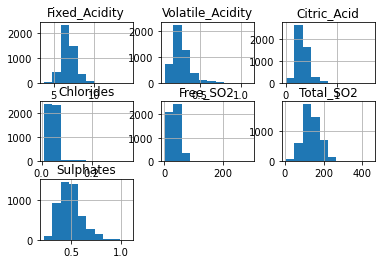

In [32]:
#Figure smt out
df_numerics = df[["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates"]]
df_numerics.hist()
plt.show()

**Response.** 

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

In [ ]:
#Quality should be colour
df_numerics = df[["Fixed_Acidity","Volatile_Acidity","Citric_Acid","Chlorides","Free_SO2","Total_SO2","Sulphates","Quality"]]
df_numerics.plot(kind='scatter', x="Fixed_Acidity", y="Volatile_Acidity", label="Quality")
plt.show()

**Response.** 

For the purposes of EDA, we chose not to rectify the missing values or outliers identified previously. This was to give us a better understanding of how the data is as a whole. After understanding the data more through our EDA, we will now proceed to perform missing value imputation and outlier removal